In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import saveload as sl
import pandas as pd
from datetime import datetime, timedelta 

In [2]:
def GetThawDate(ts,year):
    """
       - objective : 
       
       Take a temperature for a year with temperature greater than or equal to 0 and  indexed in order
       
       
       -Parameters: 
       The parameter that is used here are the year (year) of the time series data and the time series (ts) of

       -Returns:
        thawdate(yyyy:mm:dd  hr:mm:ss) is in the form of the year that is returned
   """
    AnnualTemp=ts[str(year)]
    Thawed_s=AnnualTemp[AnnualTemp>=0]
    Thawed_e=AnnualTemp[AnnualTemp>0.1]
    thawdate_start=Thawed_s.index[0]
    thawdate_end=Thawed_e.index[0]
    return thawdate_start,thawdate_end

In [3]:
def ThawStartEndFun(df,year,depth,delay=30):
    """
       - objective : 
       Calculate the dates for thawing process
       
       -Parameters: 
       df: data in format .pkl. use : df=sl.load('/home/ines/Documents/mientras/data/OJP/OJP_NW_T.pkl')
       year: in format yyyy
       depth:in centimetres. Depth for the measurements. Pick from: 002, 005, 010, 020, 050, 100
       delay: (=30) in days. Time to delay to catch the thawing beginnign delay with the depth

        -Returns:
        x1(mm-dd): Months and days for the Thawing process 
        
   """    
    
    column='SoilTemp_'+depth+'cmNW'
    thawdate1,thawdate2=GetThawDate(df[column],year)
    end=thawdate1+timedelta(days = delay) 
    start=thawdate1+timedelta(days = -7)
    
   
    
    dates=pd.date_range(start=thawdate1, end=thawdate2,freq='D',normalize=bool)
       
    YEAR=dates.year
    x1=dates.strftime("%m-%d")
     
    ThawingPeriods = {'YEAR':YEAR[:1], 'Length(days)':len(dates), 'Date_Start':start, 'Date_End':end}  
    dfThawingPeriods=pd.DataFrame((ThawingPeriods),columns = ['YEAR','Length(days)','Length(days)','Date_Start','Date_End'])
    
    return x1

In [4]:
def PlotThawStartEnd(df,year_str,year_end,depth,delay):
    """
       - objective : 
       Plot the thawing perio (Start - End) for several years into only one plot
       
       -Parameters: 
       df: data in format .pkl. use : df=sl.load('/home/ines/Documents/mientras/data/OJP/OJP_NW_T.pkl')
       year_str: in format yyyy.Start year
       year_end: in format yyyy.Ending year
       depth:in centimetres. Depth for the measurements (exmple:depth='020'). Pick from: 002, 005, 010, 020, 050, 100
       delay: (=30) in days. Time to delay to catch the thawing beginnign delay with the depth

        -Returns:
        Plot in format png.  
        
   """  
    
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    for i in range(year_str,year_end):
        x1=ThawStartEndFun(df,i,depth,delay)
        YEAR=np.full(len(x1),i)
        ax.plot_date(x1, YEAR, xdate=True, ydate=False, ls='-', ms=0,lw=5)
        ax.xaxis.set_tick_params(rotation=90, labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)
        ax.grid(True)
        plt.xlabel("Date(month-day)",fontsize=18)
        plt.ylabel("Year",fontsize=18)
    plt.show()
    plt.close(fig)
    plt.savefig('PlotThawStartEnd.png')


In [5]:
# Load dataframe of Temperature at different depths:
df=sl.load('/home/ines/Documents/mientras/data/OJP/OJP_NW_T.pkl')
year=2009
column='SoilTemp_'+'020'+'cmNW'
thawdate1,thawdate2=GetThawDate(df[column],year)




/usr/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

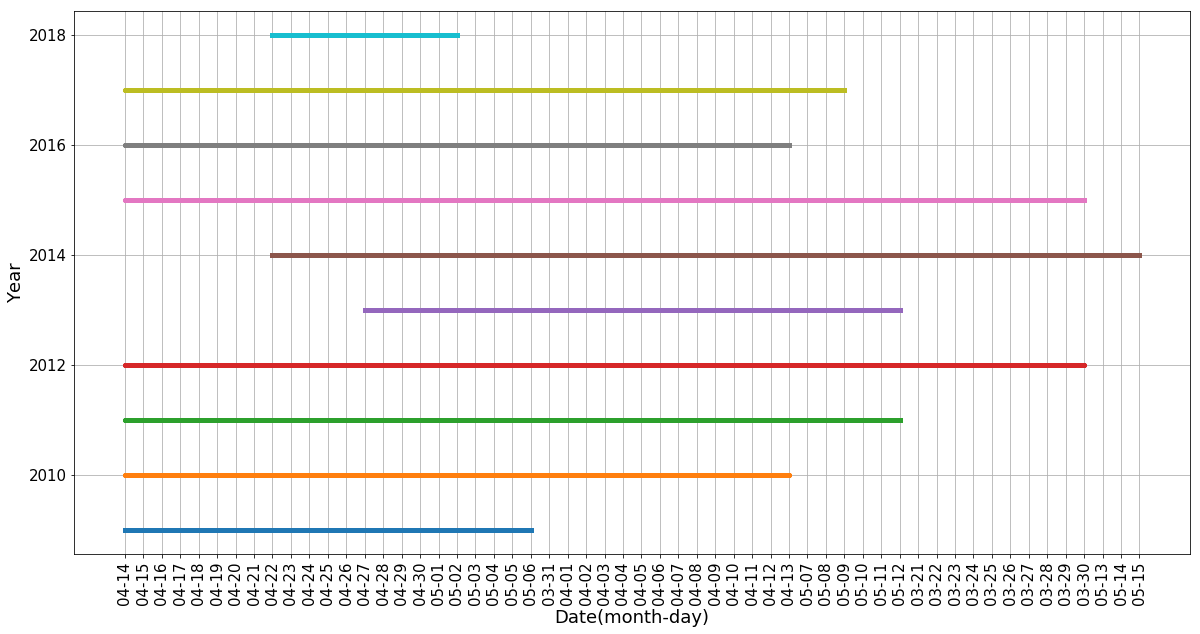

<Figure size 432x288 with 0 Axes>

In [6]:
PlotThawStartEnd(df,2009,2019,depth='020',delay=30)